Importing necessary Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style='whitegrid')


Load The Dataset

In [3]:
df = pd.read_excel("WorldBank.xlsx", sheet_name="Development Indicators")
df.head()


,Country Name,Country Code,Region,IncomeGroup,Year,"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)",Electric power consumption (kWh per capita),GDP (USD),GDP per capita (USD),Individuals using the Internet (% of population),"Infant mortality rate (per 1,000 live births)",Life expectancy at birth (years),Population density (people per sq. km of land area),Unemployment (% of total labor force) (modeled ILO estimate)
0,Afghanistan,AFG,South Asia,Low income,2018,NaN,NaN,NaN,1.936300e+10,520.897,NaN,47.9,NaN,56.9378,1.542
1,Afghanistan,AFG,South Asia,Low income,2017,33.211,6.575,NaN,2.019180e+10,556.302,13.50,49.5,64.130,55.5960,1.559
2,Afghanistan,AFG,South Asia,Low income,2016,33.981,6.742,NaN,1.936260e+10,547.228,11.20,51.2,63.763,54.1971,1.634
3,Afghanistan,AFG,South Asia,Low income,2015,34.809,6.929,NaN,1.990710e+10,578.466,8.26,53.1,63.377,52.7121,1.679
4,Afghanistan,AFG,South Asia,Low income,2014,35.706,7.141,NaN,2.048490e+10,613.856,7.00,55.1,62.966,51.1148,1.735


Missing Data Analysis

In [4]:
missing = df.isnull().sum().sort_values(ascending=False)
missing = missing[missing > 0]
missing_percent = (missing / len(df)) * 100

missing_data = pd.DataFrame({
    'Missing Values': missing,
    'Percentage (%)': missing_percent
})

missing_data


,Missing Values,Percentage (%)
Individuals using the Internet (% of population),7385,59.322034
Unemployment (% of total labor force) (modeled ILO estimate),7241,58.165314
Electric power consumption (kWh per capita),6601,53.024339
GDP per capita (USD),2874,23.086192
GDP (USD),2871,23.062093
"Infant mortality rate (per 1,000 live births)",2465,19.800787
Life expectancy at birth (years),1273,10.225721
"Death rate, crude (per 1,000 people)",1033,8.297855
"Birth rate, crude (per 1,000 people)",1009,8.105069
Population density (people per sq. km of land area),604,4.851795


Clean the Data

In [5]:
clean_df = df.dropna(subset=[
    'GDP (USD)', 
    'Life expectancy at birth (years)', 
    'Individuals using the Internet (% of population)'
])
clean_df.shape


(4660, 15)

Descriptive Stats

In [6]:
clean_df[['GDP (USD)', 'Life expectancy at birth (years)', 'Individuals using the Internet (% of population)']].describe()


,GDP (USD),Life expectancy at birth (years),Individuals using the Internet (% of population)
count,4.660000e+03,4660.000000,4660.000000
mean,2.848180e+11,68.967123,22.292373
std,1.191976e+12,9.597140,27.540469
min,3.041230e+07,33.413000,0.000000
25%,4.192922e+09,63.289250,0.586991
50%,1.821410e+10,71.464000,7.800000
75%,1.222500e+11,76.027100,38.564925
max,1.950000e+13,84.680500,100.000000


Visualization

Histogram(GDP)


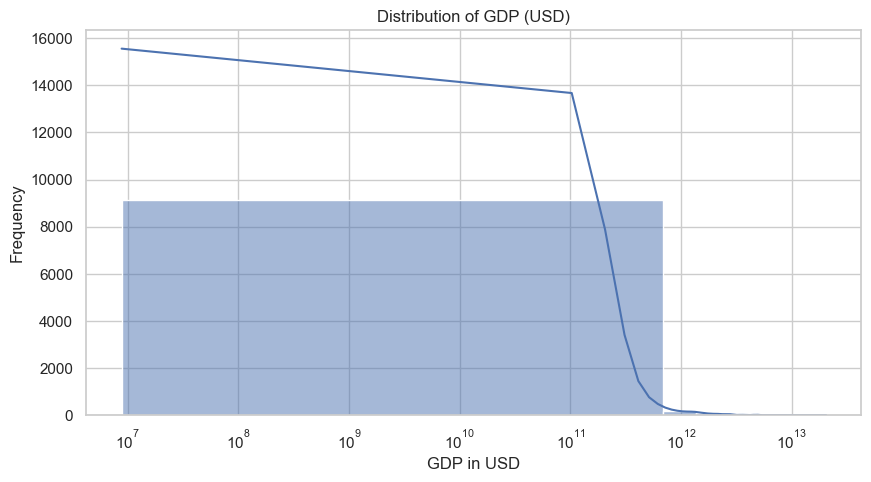

In [11]:
plt.figure(figsize=(10, 5))
sns.histplot(df['GDP (USD)'], bins=30, kde=True)
plt.title("Distribution of GDP (USD)")
plt.xlabel("GDP in USD")
plt.ylabel("Frequency")
plt.xscale("log")
plt.grid(True)
plt.show()


Boxplot – Life Expectancy

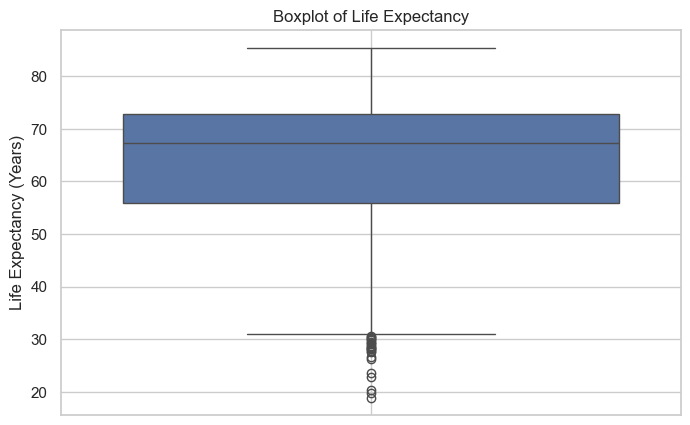

In [12]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, y='Life expectancy at birth (years)')
plt.title("Boxplot of Life Expectancy")
plt.ylabel("Life Expectancy (Years)")
plt.grid(True)
plt.show()


Scatter Plot – GDP vs Life Expectancy

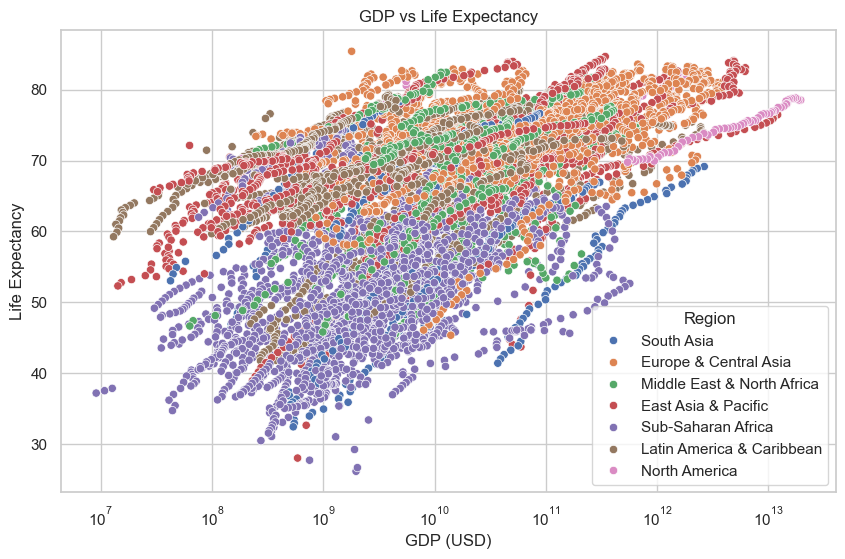

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='GDP (USD)', y='Life expectancy at birth (years)', hue='Region')
plt.title("GDP vs Life Expectancy")
plt.xlabel("GDP (USD)")
plt.ylabel("Life Expectancy")
plt.xscale("log")
plt.grid(True)
plt.show()


Line Plot – Internet Usage Over Time by Region

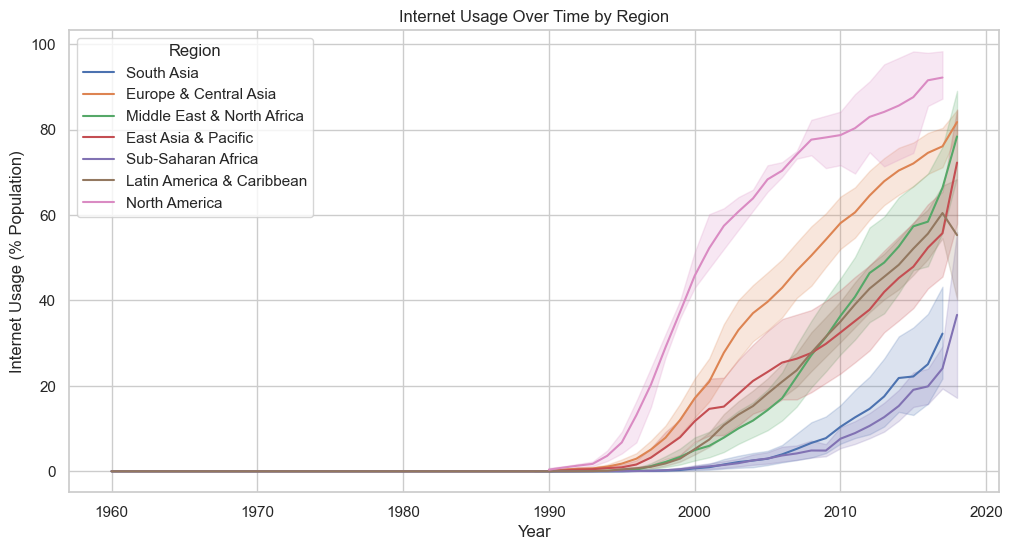

In [14]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Year', y='Individuals using the Internet (% of population)', hue='Region')
plt.title("Internet Usage Over Time by Region")
plt.xlabel("Year")
plt.ylabel("Internet Usage (% Population)")
plt.grid(True)
plt.show()


Bar Plot – Top 10 Countries by GDP (Latest Year)

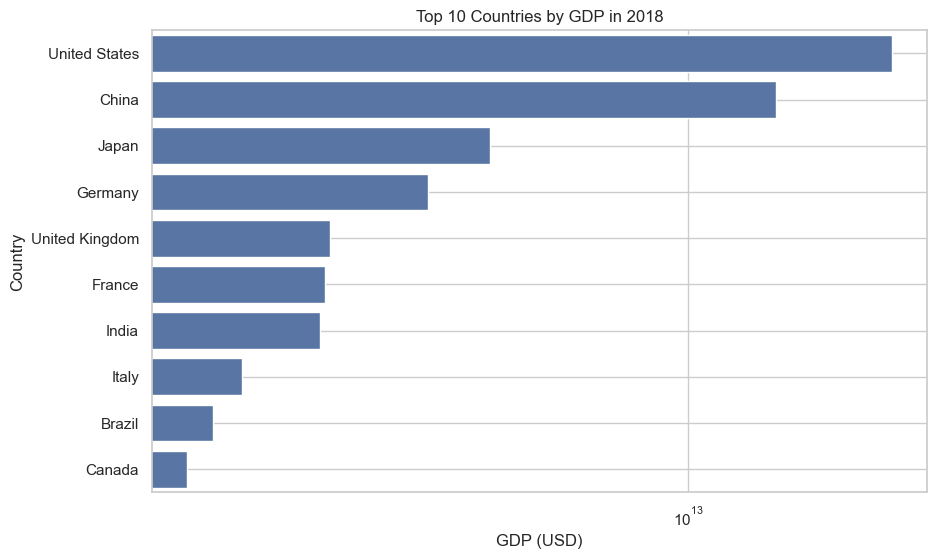

In [21]:
latest_year = df['Year'].max()
top10_gdp = df[df['Year'] == latest_year].sort_values(by='GDP (USD)', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top10_gdp, y='Country Name', x='GDP (USD)')
plt.title(f"Top 10 Countries by GDP in {latest_year}")
plt.xlabel("GDP (USD)")
plt.ylabel("Country")
plt.xscale("log")
plt.grid(True)
plt.show()

Heatmap – Correlation of Numeric Variables

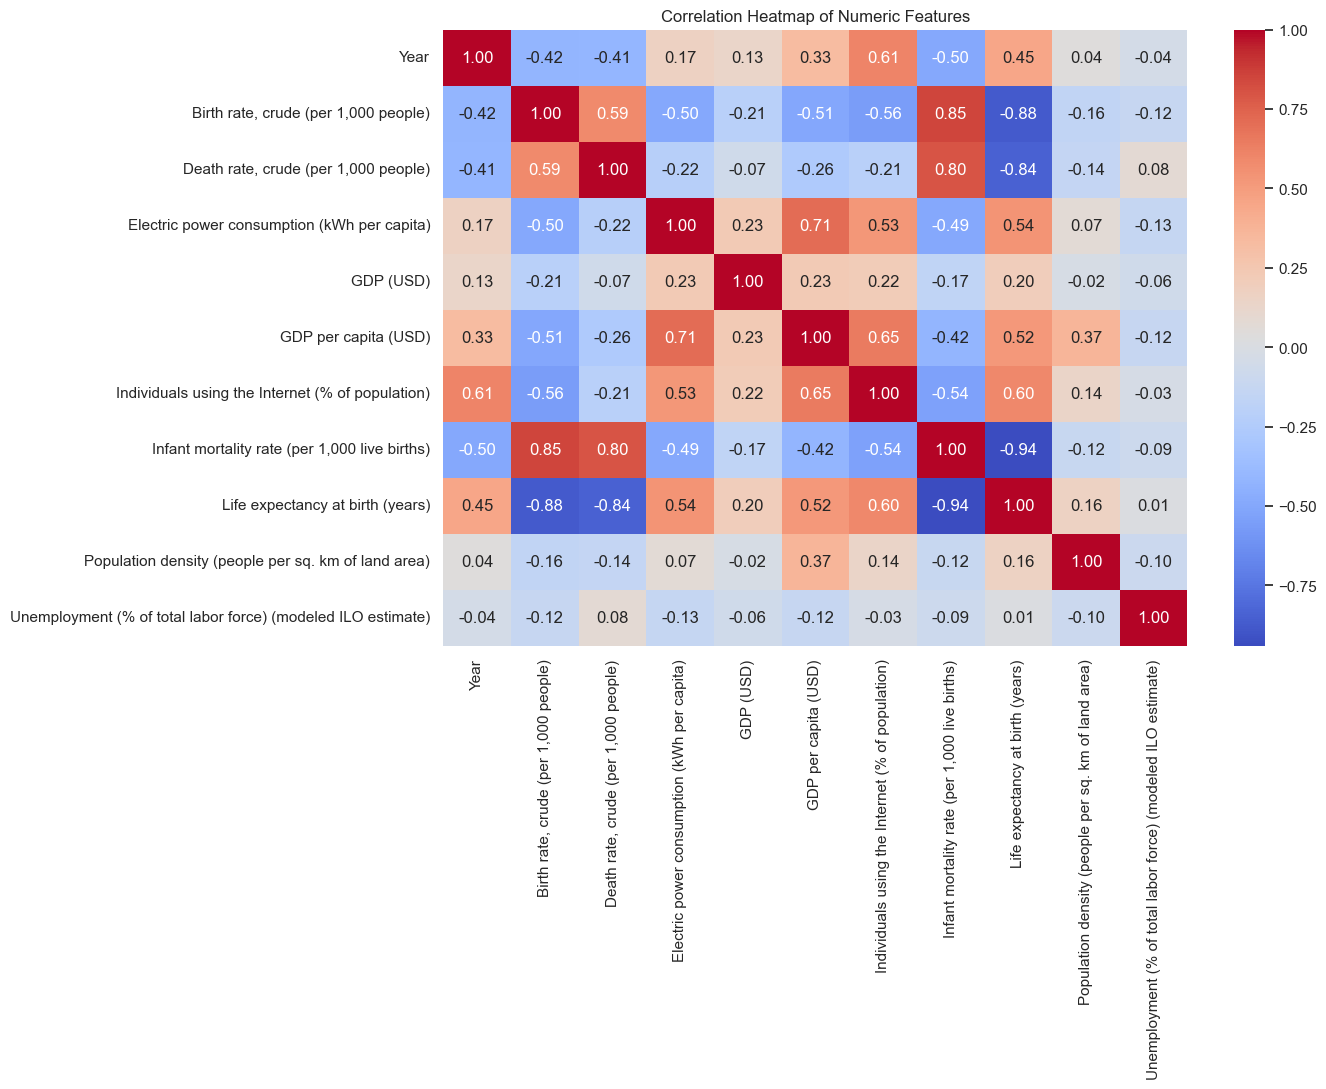

In [17]:
plt.figure(figsize=(12, 8))
numeric_cols = df.select_dtypes(include='number')
corr_matrix = numeric_cols.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of Numeric Features")
plt.show()
